the following R code:


x1points = seq(from = 0, to = 10, by = 1)
x2points = x1points

asd = function(x) {return(which.max(x))}

grid = expand.grid(x1points, x2points)
print(grid)

F1ongrid = apply(grid, MARGIN = 1:2, FUN = asd)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

h [cm]: [0.    1.016 1.778 2.413 3.429 4.572 5.969 7.493]


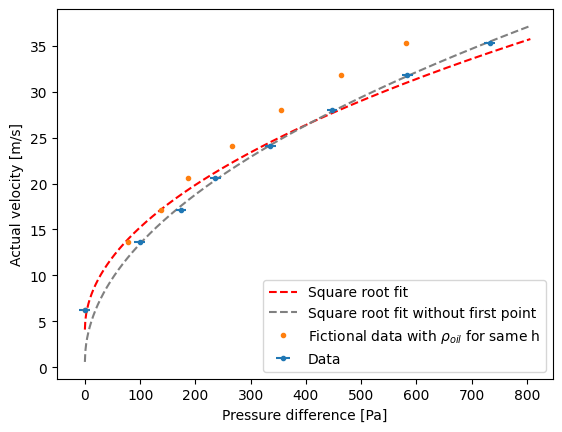

V_measured [m/s]: [ 0.         12.71123081 16.81537779 19.58932229 23.35202211 26.9645925
 30.80998877 34.51982751] 
V_actual [m/s]: [ 6.21 13.6  17.1  20.6  24.1  28.   31.8  35.3 ]
[0.         0.79485715 0.60085553 0.51577143 0.43266543 0.37469926
 0.32793302 0.29269013]


In [9]:
h = np.array([0, 0.4, 0.7, 0.95, 1.35, 1.8, 2.35, 2.95])*0.0254
print("h [cm]:", h*100)
dp = h*998*9.8
dp_error = 0.05*0.0254*790*9.81
V_actual = np.array([6.21, 13.6, 17.1, 20.6, 24.1, 28.0, 31.8, 35.3])
dp_oil = h*790*9.81

def sqrt(x, a, b):
    return a*np.sqrt(x) + b

X = np.linspace(0, np.max(dp)*1.1, 1000)
par, cov = curve_fit(sqrt, dp, V_actual)
par1, cov1 = curve_fit(sqrt, dp[1:], V_actual[1:])

plt.plot(X, sqrt(X, *par), c = 'r', linestyle = '--', label = 'Square root fit')
plt.plot(X, sqrt(X, *par1), c = 'grey', linestyle = '--', label = 'Square root fit without first point')

plt.errorbar(dp, V_actual, xerr = dp_error, fmt = '.', label = 'Data')
plt.plot(dp_oil, V_actual, '.', label = f'Fictional data with $\\rho_{{oil}}$ for same h')
plt.xlabel('Pressure difference [Pa]')
plt.ylabel('Actual velocity [m/s]')
# plt.title('Actual velocity vs pressure difference')
# plt.gcf().set_size_inches(10, 6)
plt.legend()
plt.show()

V_measured = np.sqrt(2*dp/1.23)
print("V_measured [m/s]:", V_measured, "\nV_actual [m/s]:", V_actual)
dV_measured = np.append([0], 0.05*0.0254*np.sqrt(998*9.81/(2*1.23*h[1:])))
print(dV_measured)
# plt.plot(V_measured, V_actual, '.', label = 'Measured velocity')
# asd = np.linspace(np.min(V_measured), np.max(V_measured), 1000)
# plt.plot(asd, asd, c = 'r', linestyle = '--', label = 'y = x')


In [20]:
for i in range(len(V_measured)):
    print(f"{V_measured[i]:.2f}$\pm${dV_measured[i]:.2f}")
print(h)
print((V_actual[0]**2*(1/2)*1.23)/(998*9.81)/0.0254)

0.00$\pm$0.00
12.71$\pm$0.79
16.82$\pm$0.60
19.59$\pm$0.52
23.35$\pm$0.43
26.96$\pm$0.37
30.81$\pm$0.33
34.52$\pm$0.29
[0.      0.01016 0.01778 0.02413 0.03429 0.04572 0.05969 0.07493]
0.09537291371010459


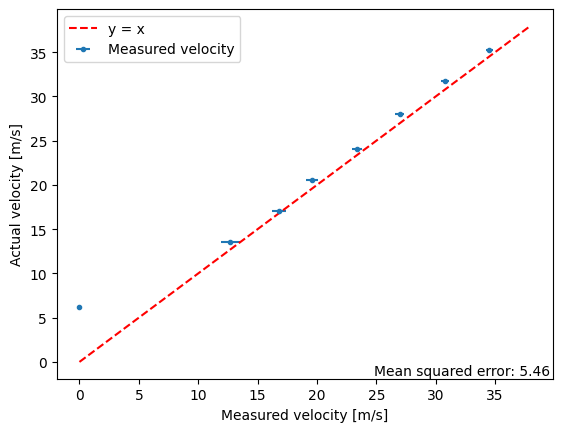

In [10]:
MSS = np.mean((V_measured - V_actual)**2)
plt.text(0.64, 0.01, f'Mean squared error: {MSS:.2f}', transform = plt.gca().transAxes)
plt.errorbar(V_measured, V_actual, fmt = '.', label = 'Measured velocity', xerr = dV_measured)
asd = np.linspace(np.min(V_measured), np.max(V_measured)*1.1, 1000)
plt.plot(asd, asd, c = 'r', linestyle = '--', label = 'y = x');
plt.xlabel('Measured velocity [m/s]')
plt.ylabel('Actual velocity [m/s]')
plt.legend();
# print(V_measured)
# print(V_measured[1:])
# def linfunc(x, a, b):
#     return a*x + b
# X = np.linspace(np.min(V_measured), np.max(V_measured), 1000)
# par, cov = curve_fit(linfunc, V_measured[1:], V_actual[1:])
# plt.plot(X, linfunc(X, *par), c = 'g', linestyle = '--', label = 'Linear fit');
# print(par)
# plt.legend()

In [34]:
hangle = np.array([2.4-0.6, 2.7-2.0, 2.9-3.4])*0.0254
dpangle = hangle*998*9.8
speed_actual = [27.9]*len(dpangle)
angle = np.array([20, 35, 70])*np.pi/180
Velocity_angle = np.sqrt(2*dpangle/(1.23*np.cos(2*angle)))
dvangle = np.sqrt(
    (0.1*0.0254*np.sqrt(998*9.81/(2*1.23*hangle*np.cos(2*angle))))**2 +
    (0 * (2*dpangle*np.sin(2*angle))/(1.23*np.cos(2*angle)**2*Velocity_angle))**2
)
print(dvangle)
print(Velocity_angle)
# print(dpangle)
# print(2*dpangle*np.sin(2*angle)

[0.85622094 2.05482205 1.624565  ]
[30.80823924 28.75284258 16.23736779]
